## Extracting NFLX Datasets

This notebook shows how to extract datasets once they have been collected. Please refer to the [distributed dataset collection tools](https://github.com/AlgoTraders/stock-analysis-engine#distributed-automation-with-docker) for quickly downloading some data.

### Start Services

To develop jupyter notebooks start the [notebook-integration](https://github.com/AlgoTraders/stock-analysis-engine/blob/master/compose/notebook-integration.yml) containers using docker-compose. Here's the command to start it:
```
./compose/start.sh -j
```
Verify the containers are running:
```
docker ps -a
```

The sample data for this guide was collected using the automated dataset collection:
```
./compose/start.sh -c
```

### Verify Datasets are in Redis

By default the datasets are [automatically archived in S3](http://localhost:9000/minio/pricing/) and cached in Redis. Until S3 extraction is supported, let's confirm the datasets are in Redis before continuing.

These commands assume you have the [redis client installed](https://redis.io/download):

```
redis-cli
127.0.0.1:6379> select 4
OK
127.0.0.1:6379[4]> keys NFLX_*
 1) "NFLX_2018-10-05_tick"
 2) "NFLX_2018-10-05_news"
 3) "NFLX_2018-10-05_daily"
 4) "NFLX_2018-10-05_stats"
 5) "NFLX_2018-10-05"
 6) "NFLX_2018-10-05_minute"
 7) "NFLX_2018-10-05_options"
 8) "NFLX_2018-10-05_company"
 9) "NFLX_2018-10-05_dividends"
10) "NFLX_2018-10-05_pricing"
11) "NFLX_2018-10-05_peers"
12) "NFLX_2018-10-05_news1"
127.0.0.1:6379[4]> 
```

### Start the Logger

In [1]:
import datetime
from spylunking.log.setup_logging import build_colorized_logger
from analysis_engine.iex.utils import last_close

log = build_colorized_logger(name='intro-ds-1', handler_name='jupyter')

### Select a Ticker and Date

In [2]:
ticker = 'NFLX'
use_last_close = last_close()
last_close_str = use_last_close.strftime('%Y-%m-%d')
log.info('Using ticker={} and last close={}'.format(ticker, last_close_str))

INFO - Using ticker=NFLX and last close=2018-10-05


### Extracting Minute Cache

In [3]:
from analysis_engine.iex.extract_df_from_redis import extract_minute_dataset

base_redis_key = '{}_{}'.format(ticker, last_close_str)
minute_redis_key = '{}_minute'.format(base_redis_key)
req = {
    'ticker': ticker,
    'redis_key': minute_redis_key,
    'label': 'intro-ds-1'
}

log.info('extracting - start - ticker={} from redis_key={}'.format(ticker, req['redis_key']))
extract_status, minute_df = extract_minute_dataset(work_dict=req)
log.info('extracting - done - ticker={} from redis_key={}'.format(ticker, req['redis_key']))

2018-10-07 07:54:50,693 - intro-ds-1 - INFO - extracting - start - ticker=NFLX from redis_key=NFLX_2018-10-05_minute
2018-10-07 07:54:50,697 - analysis_engine.iex.extract_df_from_redis - INFO - intro-ds-1 - minute - start
2018-10-07 07:54:50,700 - analysis_engine.extract_utils - INFO - intro-ds-1 - minute - START - ds_id=NFLX scrub_mode=sort-by-date redis=True redis_address=redis:6379@4 redis_key=NFLX_2018-10-05_minute s3=True s3_address=minio:9000 s3_bucket=pricing s3_key=test_key
2018-10-07 07:54:50,702 - analysis_engine.build_df_from_redis - INFO - intro-ds-1 calling get redis key=NFLX_2018-10-05_minute
2018-10-07 07:54:50,704 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-05_minute
2018-10-07 07:54:50,708 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-05_minute encoding=utf-8
2018-10-07 07:54:50,710 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-05_minute serializer

2018-10-07 07:55:10,423 - intro-ds-1 - INFO - ticker=NFLX creating chart date=2018-10-07
2018-10-07 07:55:10,429 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - start


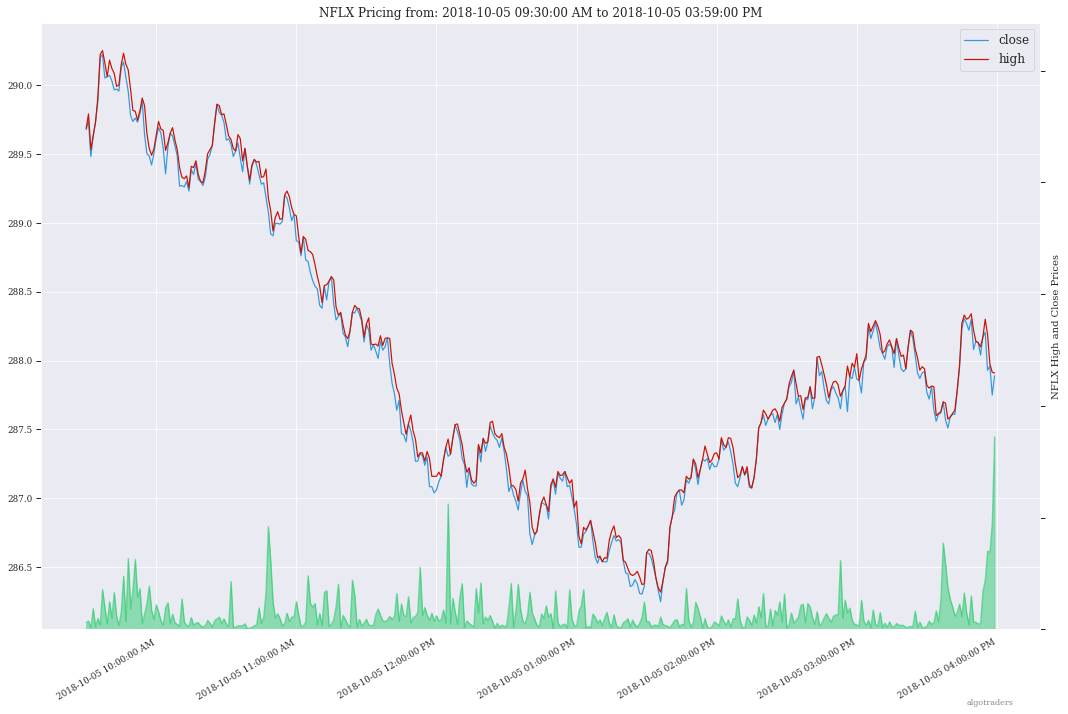

2018-10-07 07:55:11,028 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - done status=SUCCESS err=None


In [7]:
import analysis_engine.charts as ae_charts
from analysis_engine.consts import SUCCESS
from analysis_engine.consts import IEX_MINUTE_DATE_FORMAT

today_str = datetime.datetime.now().strftime('%Y-%m-%d')
if extract_status == SUCCESS:
    log.info(
        'ticker={} creating chart date={}'.format(
            ticker,
            today_str))
    """
    Plot Pricing with the Volume Overlay:
    """
    image_res = ae_charts.plot_overlay_pricing_and_volume(
        log_label='intro-nb-{}'.format(ticker),
        ticker=ticker,
        date_format=IEX_MINUTE_DATE_FORMAT,
        df=minute_df,
        show_plot=True)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, req['redis_key']))

### Extracting Daily Cache

In [5]:
from analysis_engine.iex.extract_df_from_redis import extract_daily_dataset

base_redis_key = '{}_{}'.format(ticker, last_close_str)
minute_redis_key = '{}_daily'.format(base_redis_key)
req = {
    'ticker': ticker,
    'redis_key': minute_redis_key,
    'label': 'intro-ds-1'
}

log.info('extracting - start - ticker={} from redis_key={}'.format(ticker, req['redis_key']))
extract_status, daily_df = extract_daily_dataset(work_dict=req)
log.info('extracting - done - ticker={} from redis_key={}'.format(ticker, req['redis_key']))

2018-10-07 07:54:51,892 - intro-ds-1 - INFO - extracting - start - ticker=NFLX from redis_key=NFLX_2018-10-05_daily
2018-10-07 07:54:51,896 - analysis_engine.iex.extract_df_from_redis - INFO - intro-ds-1 - daily - start
2018-10-07 07:54:51,900 - analysis_engine.extract_utils - INFO - intro-ds-1 - daily - START - ds_id=NFLX scrub_mode=sort-by-date redis=True redis_address=redis:6379@4 redis_key=NFLX_2018-10-05_daily s3=True s3_address=minio:9000 s3_bucket=pricing s3_key=test_key
2018-10-07 07:54:51,904 - analysis_engine.build_df_from_redis - INFO - intro-ds-1 calling get redis key=NFLX_2018-10-05_daily
2018-10-07 07:54:51,908 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 get key=NFLX_2018-10-05_daily
2018-10-07 07:54:51,917 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 decoding key=NFLX_2018-10-05_daily encoding=utf-8
2018-10-07 07:54:51,921 - analysis_engine.get_data_from_redis_key - INFO - intro-ds-1 deserial key=NFLX_2018-10-05_daily serializer=json
20

2018-10-07 07:54:52,028 - intro-ds-1 - INFO - ticker=NFLX creating chart date=2018-10-07
2018-10-07 07:54:52,032 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - start


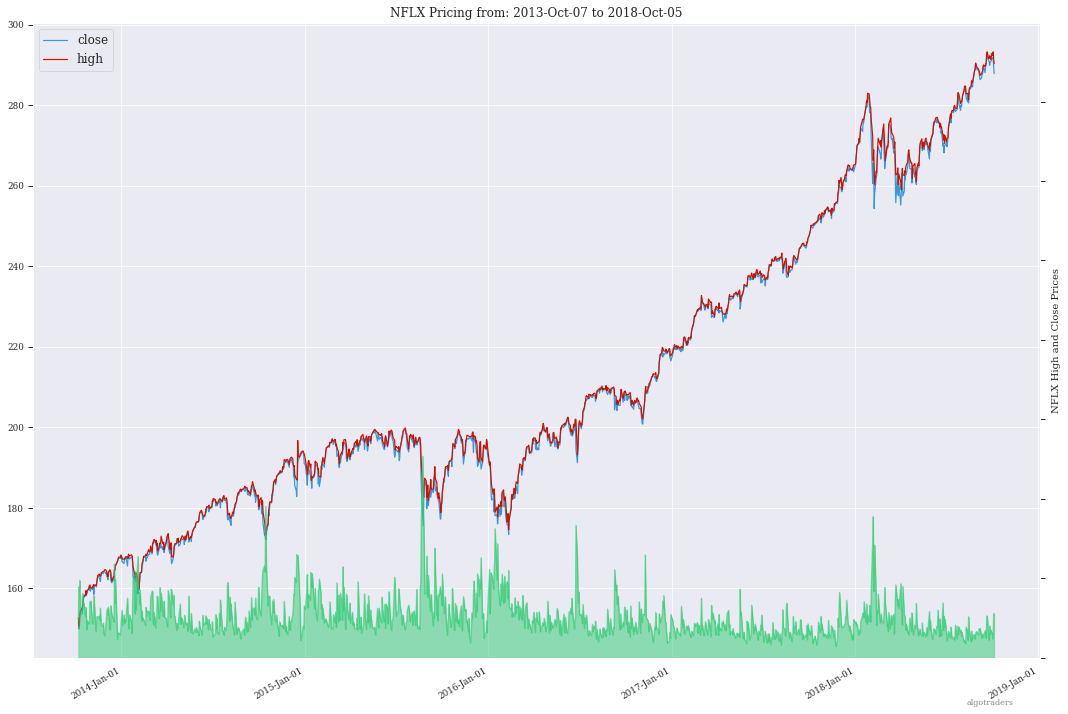

2018-10-07 07:54:52,780 - analysis_engine.charts - INFO - intro-nb-NFLX - plot_overlay_pricing_and_volume - done status=SUCCESS err=None


In [6]:
import analysis_engine.charts as ae_charts
from analysis_engine.consts import SUCCESS
from analysis_engine.consts import IEX_DAILY_DATE_FORMAT

today_str = datetime.datetime.now().strftime('%Y-%m-%d')
if extract_status == SUCCESS:
    log.info(
        'ticker={} creating chart date={}'.format(
            ticker,
            today_str))
    """
    Plot Pricing with the Volume Overlay:
    """
    image_res = ae_charts.plot_overlay_pricing_and_volume(
        log_label='intro-nb-{}'.format(ticker),
        ticker=ticker,
        date_format=IEX_DAILY_DATE_FORMAT,
        df=daily_df,
        show_plot=True)
else:
    log.error('ticker={} - did not extract a dataset from redis_key={}'.format(ticker, req['redis_key']))